In [1]:
import torch
torch.manual_seed(0)

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from torchvision import datasets, transforms

data_path = './data/cifar10'
transform = transforms.ToTensor()

cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
print("Training: ", len(cifar10_train))
print("Testing: ", len(cifar10_test))

Training:  50000
Testing:  10000


In [5]:
image, label = cifar10_train[0]
print(image)
print(image.shape)
print(label)

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [6]:
cifar10_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

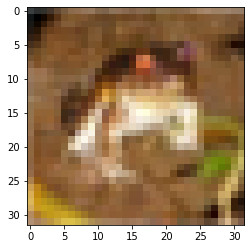

In [7]:
import matplotlib.pyplot as plt

plt.imshow(image.permute(1, 2, 0))

In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=500, shuffle=False)

In [9]:
for (X_train, y_train) in train_loader:
    print(X_train.shape)
    print(y_train.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


## Tasks
### Task 1:
Implement a neural network with one hidden layer. The hidden layer has 10 neurons and uses Relu as activation function. There is no activation on the output layer.

In [10]:
import torch.nn as nn
import torch.nn.functional as F 

class NeuralNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(3072, 10)
        self.output = nn.Linear(10, 10)

    def forward(self, X):
        X = F.relu(self.hidden(X))
        X = self.output(X)

        return X

### Task 2:

Train the network:
   - Use `CrossEntropyLoss` and a learning rate of `0.01` for 20 epochs.
   - Perform mini-batch gradient descent: In every epoch iterate through the `train_loader` like shown in the cell above and update the weights only on the data points that are in the current mini-batch.
   - After every 100 mini-batches, print out the current loss.
   - Note: You have to flatten the input dimension of an image from 3x32x32 to one dimension, since a neural network expects a linear input. Check out `torch.flatten(...)` for that.
   - Print the loss plot.

In [11]:
model = NeuralNet()
model.to(device)
model.train()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 20

train_losses = []
for i in range(epochs):

    batch_iteration = 1
    for (X_train, y_train) in train_loader:
        X_train = X_train.to(device) #needed when using gpu
        y_train = y_train.to(device) #needed when using gpu
        
        X = torch.flatten(X_train, start_dim=1)
        y_pred = model(X)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_iteration % 100 == 0:
            print( f'epoch: {i} batch {batch_iteration} loss: {loss.item()}')
        
        batch_iteration +=1
            
    train_losses.append(loss.item())

epoch: 0 batch 100 loss: 2.189243793487549
epoch: 0 batch 200 loss: 2.105489730834961
epoch: 0 batch 300 loss: 2.098823070526123
epoch: 0 batch 400 loss: 2.0174190998077393
epoch: 0 batch 500 loss: 1.8382809162139893
epoch: 1 batch 100 loss: 1.9104341268539429
epoch: 1 batch 200 loss: 1.9592945575714111
epoch: 1 batch 300 loss: 1.9865107536315918
epoch: 1 batch 400 loss: 1.9453526735305786
epoch: 1 batch 500 loss: 1.8667540550231934
epoch: 2 batch 100 loss: 1.8408470153808594
epoch: 2 batch 200 loss: 1.8319135904312134
epoch: 2 batch 300 loss: 1.840193271636963
epoch: 2 batch 400 loss: 1.9624981880187988
epoch: 2 batch 500 loss: 2.011812686920166
epoch: 3 batch 100 loss: 1.8774505853652954
epoch: 3 batch 200 loss: 1.9102809429168701
epoch: 3 batch 300 loss: 1.9361375570297241
epoch: 3 batch 400 loss: 1.9021567106246948
epoch: 3 batch 500 loss: 1.7873059511184692
epoch: 4 batch 100 loss: 1.6805535554885864
epoch: 4 batch 200 loss: 1.782638669013977
epoch: 4 batch 300 loss: 1.90571165084

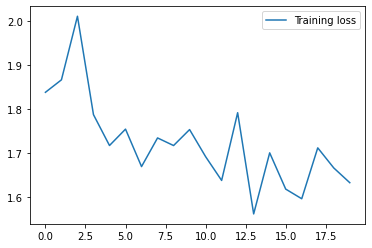

In [12]:
plt.plot(train_losses, label= "Training loss")
plt.legend()

### Task 3:
Predict on the test data with the trained network and calculate the accuracy. Iterate through the `test_loader` for this.

In [13]:
correct = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    X_test = torch.flatten(X_test, start_dim=1)
    y_val = model(X_test)
    predicted = torch.argmax(y_val,1)
    correct += (predicted == y_test).sum()

100*correct.item()/len(cifar10_test)

40.53

### Task 4:
The accuracy with this basic architecture is not very good. Try to improve the accuarcy by adding a second hidden layer that has more neurons. Train again for 20 epochs and check the accuracy on the test data.


In [14]:
import torch.nn as nn
import torch.nn.functional as F 

class NeuralNetBigger(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return X

In [15]:
model = NeuralNetBigger()
model.to(device)
model.train()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 20

train_losses = []
for i in range(epochs):

    batch_iteration = 1
    for (X_train, y_train) in train_loader:
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        
        X = torch.flatten(X_train, start_dim=1)
        y_pred = model(X)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_iteration +=1
            
    train_losses.append(loss.item())
    
correct = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    X_test = torch.flatten(X_test, start_dim=1)
    y_val = model(X_test)
    predicted = torch.argmax(y_val,1)
    correct += (predicted == y_test).sum()

100*correct.item()/len(cifar10_test)

45.73

### Task 5: Check for overfitting
Increase the number of epochs to 35 and check if the new network is overfitting. For this you need to plot the accuracy plot: Predict after every epoch on the complete train and test data with the current model. Remember these values and plot both curves after the training as shown on the lecture slides. What effect can you observe in relation to epochs and overfitting? 

In [16]:
model = NeuralNetBigger()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 35

train_losses = []
train_accuracy = []
test_accuracy  = []

for i in range(epochs):
    model.train()
   
    corrects = 0
    batch_iteration = 1
    for (X_train, y_train) in train_loader:
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        
        X = torch.flatten(X_train, start_dim=1)
        y_pred = model(X)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_iteration +=1
    
    print( f'epoch: {i}  loss: {loss.item()}')
    train_losses.append(loss.item())
    
    with torch.no_grad():
        model.eval()
        
        corrects = 0
        for (X_train, y_train) in train_loader:
            X_train = X_train.to(device)
            y_train = y_train.to(device)
            
            X = torch.flatten(X_train, start_dim=1)
            y_val = model(X)
            
            predicted = torch.argmax(y_val.data, 1)
            corrects += (predicted == y_train).sum()
        
        accuracy = corrects.item() / len(cifar10_train)
        train_accuracy.append(accuracy)
        
        
        corrects = 0
        for (X_test, y_test) in test_loader:
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            
            X = torch.flatten(X_test, start_dim=1)
            y_val = model(X)

            predicted = torch.argmax(y_val.data, 1)
            corrects += (predicted == y_test).sum()
        
        accuracy = corrects.item() / len(cifar10_test)
        test_accuracy.append(accuracy)

epoch: 0  loss: 2.0246527194976807
epoch: 1  loss: 1.9921261072158813
epoch: 2  loss: 1.8088128566741943
epoch: 3  loss: 1.6419003009796143
epoch: 4  loss: 1.8556441068649292
epoch: 5  loss: 1.6836045980453491
epoch: 6  loss: 1.6724295616149902
epoch: 7  loss: 1.6846251487731934
epoch: 8  loss: 1.6595081090927124
epoch: 9  loss: 1.6158883571624756
epoch: 10  loss: 1.7904934883117676
epoch: 11  loss: 1.5246696472167969
epoch: 12  loss: 1.5658742189407349
epoch: 13  loss: 1.5094910860061646
epoch: 14  loss: 1.6419678926467896
epoch: 15  loss: 1.4859544038772583
epoch: 16  loss: 1.3767950534820557
epoch: 17  loss: 1.3932368755340576
epoch: 18  loss: 1.4403445720672607
epoch: 19  loss: 1.4017289876937866
epoch: 20  loss: 1.342348337173462
epoch: 21  loss: 1.4812862873077393
epoch: 22  loss: 1.5416842699050903
epoch: 23  loss: 1.31841242313385
epoch: 24  loss: 1.564998745918274
epoch: 25  loss: 1.41090989112854
epoch: 26  loss: 1.303124189376831
epoch: 27  loss: 1.2961876392364502
epoch: 28

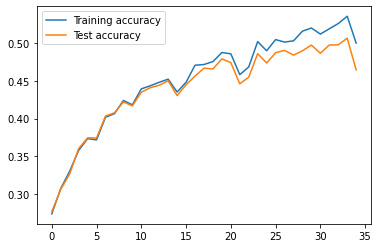

In [17]:
plt.plot(train_accuracy, label= "Training accuracy")
plt.plot(test_accuracy, label= "Test accuracy")
plt.legend()